### 1) Write a python script that construct the model that we were investigating in pyMC3.

ATP = a * Proteins + b * Carbohydrates + c * Fats + ε

Knowing that each value of Protein, Carbohydrates and Fats is a relative value to a maximum established by the researchers chosen in a random fashion to gives as a diet to the patients.

Proteins ~ Uniform (0,1) 

Carbohydrates ~ Uniform (0,1)

Fats ~ Uniform (0,1)

The values of Proteins, Carbohydrates and Fats in the file are the ones measured to the patients afterwards in blood tests.

In [1]:
import warnings
warnings.simpleFilter ="ignore"

#First we need to read the data:

import pandas as pd

data = pd.read_table("diet_and_atp.tsv")

protein = list(data.Protein)
carbohydrates = list(data.Carbohydrates)
fat = list(data.Fat)
ATP = list(data.ATP)

In [2]:
import pymc3 as pm
import numpy as np
import pymc3 as pm

model = pm.Model()
with model:
    
    #Here we define the error, and the three parameters.
    std = pm.Uniform("std", 0, 1)
    
    alpha = pm.Normal("alpha", 0, 1)
    beta = pm.Normal("beta", 0, 1)
    gamma = pm.Normal("gamma", 0, 1)
    
    # Deterministic variables that depends of random variables are set like this
    mean = pm.Deterministic("mean", alpha*protein + beta*carbohydrates + gamma*fat)
    

Up to now we have already fitted the model.

### 2) Fulfill the observations within the model and run the Metropolis algorithm to infer posterior probabilities.



In [3]:
with model:
    # We want to adjust mean and std and we have the observed data
    obs = pm.Normal("obs", mu=mean, sd=std, observed=ATP)
    
    #And we generate the trace by the Metropolis Algorithm
    trace = pm.sample(100000, step=pm.Metropolis())
    burned_trace = trace[20000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [gamma]
>Metropolis: [beta]
>Metropolis: [alpha]
>Metropolis: [std]
Sampling 4 chains, 0 divergences: 100%|██████████| 402000/402000 [01:21<00:00, 4916.79draws/s]
The number of effective samples is smaller than 10% for some parameters.


### 3) Plot the traces and the posterior, and explain the results obtained with your own words, but being as much formal as you can.

/usr/local/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/usr/local/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Arg

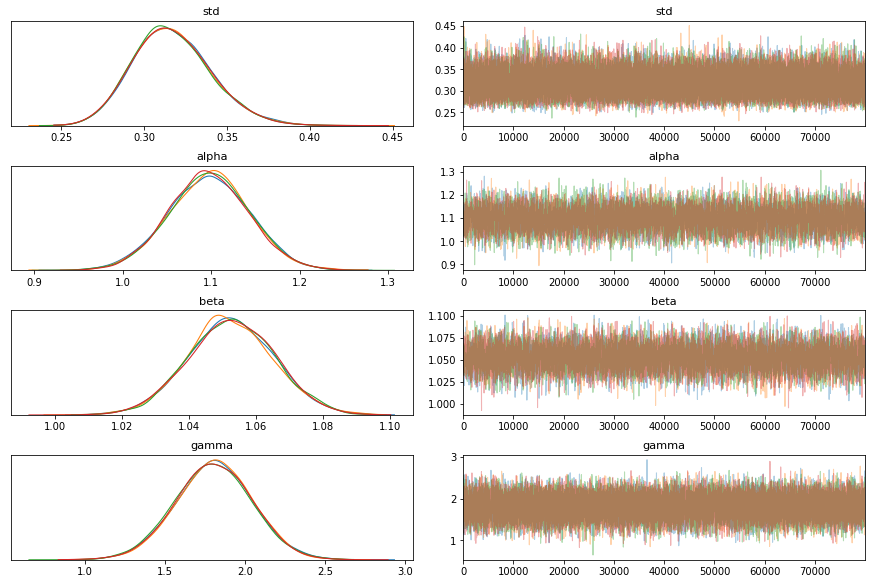

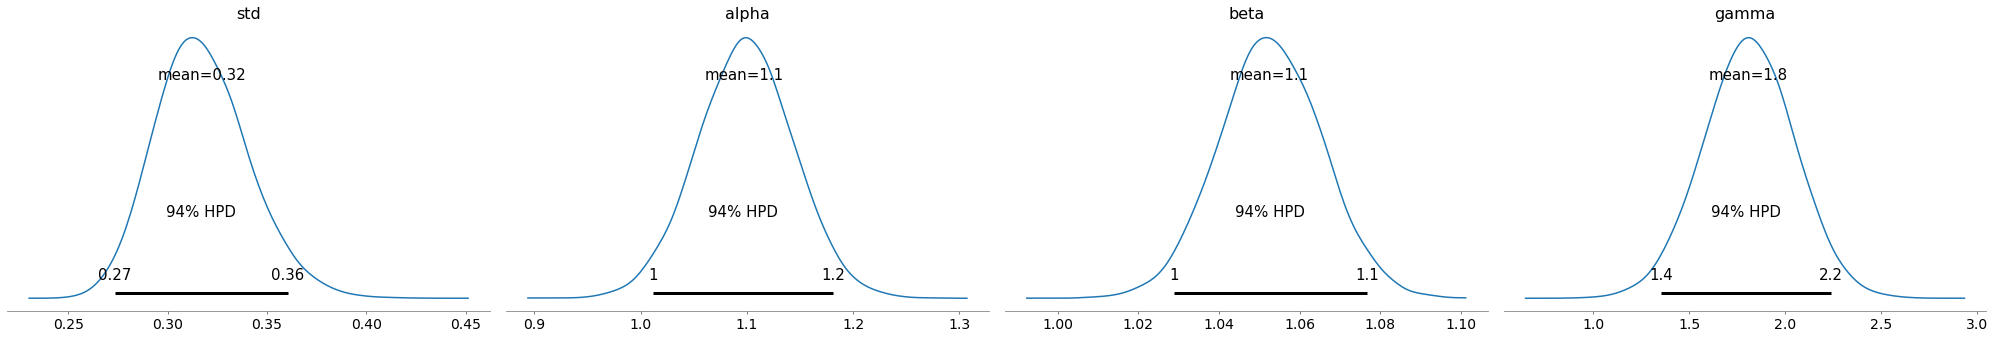

In [4]:
pm.plots.traceplot(burned_trace, varnames=["std", "alpha", "beta","gamma"])
pm.plot_posterior(burned_trace, varnames=["std", "alpha", "beta","gamma"]);

The result show us the distribution of the possible values for each one of the parameters of the model. The traceplot show us the posterior distribution once Monte Carlo algorithm has ran. Since we have explored the conformational space by the Metropolis Algorithm, we have update our beliefs about the distribution that follow the parameters.

The last plot show us the kernel density plot for each one of the parameters, the obtained mean for the distribution and a confidence interval of 95% for each parameter. That means that we have a 95% of possibility of finding the value of the parameter inside the range. As obtained with the Least Squares method, alpha and beta remains around 1.1, while gamma takes a value around 1.8-1.9.